# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and parameters
root = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
search = f'{root}appid={weather_api_key}&units={units}&q='

# Build list containers hold parsed json results from api call
lat=[]
lng=[]
mxtemp=[]
humd=[]
cloud=[]
wndsp=[]
cntry=[]
date=[]
fndcity=[]

# Prime set counter for printing iteration progress
grp = 1

# Loop through call to open weather api and append target values to list containers
for idx, city in enumerate(cities):
    
    # Error handling of missing city value, and printig iteration progress
    try:
        print(f'Processing Record {idx} of Set {grp} | {city}')
        
        response = requests.get(search+city).json()
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])    
        mxtemp.append(response['main']['temp_max'])  
        humd.append(response['main']['humidity'])  
        cloud.append(response['clouds']['all'])  
        wndsp.append(response['wind']['speed'])  
        cntry.append(response['sys']['country'])  
        date.append(response['dt'])
        fndcity.append(response['name'])
    
    # Error handling continued and increment set counter
    except (KeyError, IndexError):
        print('City not found. Skipping...')
        grp=grp+1
    
    

Processing Record 0 of Set 1 | astoria
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | waingapu
Processing Record 3 of Set 1 | yafran
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | pangody
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | lavrentiya
Processing Record 13 of Set 1 | bukachacha
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | neuquen
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | namatanai
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 22 of Set 2 | markivka
Processing Record 23 of Se

City not found. Skipping...
Processing Record 182 of Set 19 | portland
Processing Record 183 of Set 19 | soyo
Processing Record 184 of Set 19 | fevralsk
City not found. Skipping...
Processing Record 185 of Set 20 | bridge city
Processing Record 186 of Set 20 | yichang
Processing Record 187 of Set 20 | los llanos de aridane
Processing Record 188 of Set 20 | bilma
Processing Record 189 of Set 20 | beinamar
Processing Record 190 of Set 20 | avarua
Processing Record 191 of Set 20 | alotau
City not found. Skipping...
Processing Record 192 of Set 21 | buala
Processing Record 193 of Set 21 | stykkisholmur
Processing Record 194 of Set 21 | springdale
Processing Record 195 of Set 21 | flinders
Processing Record 196 of Set 21 | mocambique
City not found. Skipping...
Processing Record 197 of Set 22 | paamiut
Processing Record 198 of Set 22 | muravlenko
Processing Record 199 of Set 22 | airai
Processing Record 200 of Set 22 | san patricio
Processing Record 201 of Set 22 | boueni
Processing Record 

Processing Record 359 of Set 35 | uaua
Processing Record 360 of Set 35 | fortuna
Processing Record 361 of Set 35 | meulaboh
Processing Record 362 of Set 35 | jibuti
Processing Record 363 of Set 35 | moussoro
Processing Record 364 of Set 35 | shalya
Processing Record 365 of Set 35 | edwardsville
Processing Record 366 of Set 35 | manaus
Processing Record 367 of Set 35 | hervey bay
Processing Record 368 of Set 35 | asfi
Processing Record 369 of Set 35 | alpena
Processing Record 370 of Set 35 | betong
Processing Record 371 of Set 35 | cairo
Processing Record 372 of Set 35 | butembo
Processing Record 373 of Set 35 | phuket
Processing Record 374 of Set 35 | inhapim
Processing Record 375 of Set 35 | makakilo city
Processing Record 376 of Set 35 | mogadishu
Processing Record 377 of Set 35 | mingguang
Processing Record 378 of Set 35 | east retford
Processing Record 379 of Set 35 | ibung
Processing Record 380 of Set 35 | husavik
Processing Record 381 of Set 35 | imeni telmana
City not found. Ski

City not found. Skipping...
Processing Record 541 of Set 51 | luba
Processing Record 542 of Set 51 | maputo
Processing Record 543 of Set 51 | kedougou
Processing Record 544 of Set 51 | tidore
City not found. Skipping...
Processing Record 545 of Set 52 | balkhash
Processing Record 546 of Set 52 | beyneu
Processing Record 547 of Set 52 | nioro
Processing Record 548 of Set 52 | binga
Processing Record 549 of Set 52 | doctor pedro p. pena
City not found. Skipping...
Processing Record 550 of Set 53 | marystown
Processing Record 551 of Set 53 | matara
Processing Record 552 of Set 53 | parrita
Processing Record 553 of Set 53 | rungata
City not found. Skipping...
Processing Record 554 of Set 54 | varna
Processing Record 555 of Set 54 | tiznit
Processing Record 556 of Set 54 | mikkeli
Processing Record 557 of Set 54 | fort nelson
Processing Record 558 of Set 54 | jalu
Processing Record 559 of Set 54 | paradwip
City not found. Skipping...
Processing Record 560 of Set 55 | mawlaik
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Build dictionary of lists with clean column headers
weather_dict={
    'City':fndcity,'Lat':lat, 'Lng':lng,
    'Max Temp':mxtemp,'Humidity':humd,'Cloudiness':cloud,
    'Wind Speed':wndsp, 'Country':cntry, 'Date':date
}

# Convert dictionary of lists to dataframe object
weather_df = pd.DataFrame(weather_dict)

# Save dataframe as a csv value with stripped index for easier intake in future projects
weather_df.to_csv(output_data_file,index=False)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Astoria,46.1879,-123.8313,39.00,100,90,3.44,US,1611598188
1,Ilulissat,69.2167,-51.1000,8.60,47,1,9.22,GL,1611598188
2,Waingapu,-9.6567,120.2641,78.30,79,100,8.16,ID,1611598189
3,Yafran,32.0633,12.5286,57.76,43,87,8.81,LY,1611598189
4,Albany,42.6001,-73.9662,28.99,44,33,3.00,US,1611598042


In [5]:
# Check those stats
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.403467,12.248592,51.766175,71.710383,53.816029,8.498962,1.611598e+09
std,32.937108,89.625595,33.993060,20.643522,38.441785,6.120470,7.231787e+01
min,-54.800000,-179.166700,-47.450000,8.000000,0.000000,0.430000,1.611598e+09
25%,-8.145000,-64.383100,33.010000,61.000000,16.000000,3.440000,1.611598e+09
50%,22.285500,17.483300,63.480000,77.000000,62.000000,6.910000,1.611598e+09
75%,48.550100,87.983300,78.010000,87.000000,90.000000,11.720000,1.611598e+09
max,78.218600,178.416700,106.650000,100.000000,100.000000,34.580000,1.611598e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Find all rows with humidity erroneously showing up greater than 100%
hum_count = weather_df[weather_df['Humidity']>100].count()
hum_count

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.
hum_index = weather_df[weather_df['Humidity']>100].index
hum_index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(hum_index, inplace=False)

In [9]:
# Check those stats
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.403467,12.248592,51.766175,71.710383,53.816029,8.498962,1.611598e+09
std,32.937108,89.625595,33.993060,20.643522,38.441785,6.120470,7.231787e+01
min,-54.800000,-179.166700,-47.450000,8.000000,0.000000,0.430000,1.611598e+09
25%,-8.145000,-64.383100,33.010000,61.000000,16.000000,3.440000,1.611598e+09
50%,22.285500,17.483300,63.480000,77.000000,62.000000,6.910000,1.611598e+09
75%,48.550100,87.983300,78.010000,87.000000,90.000000,11.720000,1.611598e+09
max,78.218600,178.416700,106.650000,100.000000,100.000000,34.580000,1.611598e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

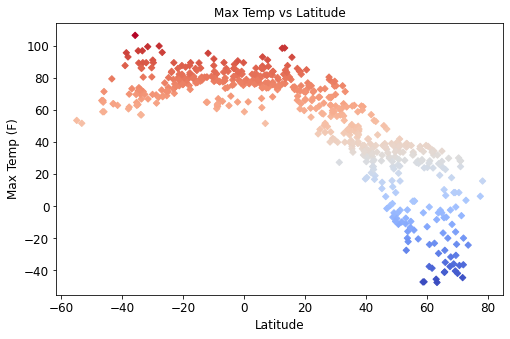

In [10]:
# Using pandas plot temperature vs. latitude, save as png in output_data folder
clean_city_data.plot.scatter('Lat',"Max Temp", c='Max Temp',title='Max Temp vs Latitude',
                             colormap='coolwarm',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Max Temp (F)',fontsize=12)
plt.savefig('output_data/lat_temp.png')

>Warmer temperatures at negative latitudes indicate that it is currently summer in the sourthern hemisphere.

## Latitude vs. Humidity Plot

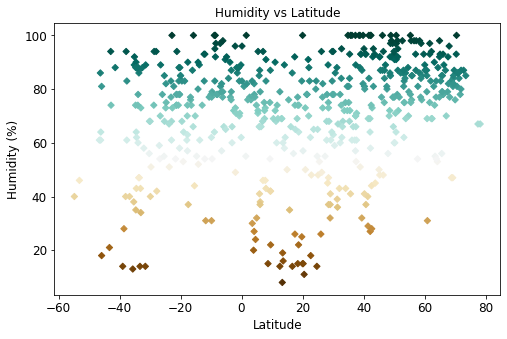

In [11]:
# Using pandas plot humidity vs latitude, save as png in output_data folder
clean_city_data.plot.scatter('Lat',"Humidity", c='Humidity',title='Humidity vs Latitude',
                             colormap='BrBG',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity (%)',fontsize=12)
plt.savefig('output_data/lat_humd.png')

>Overall Earth is a relatively moist planet, with a few dry spots shouldering the equator.

## Latitude vs. Cloudiness Plot

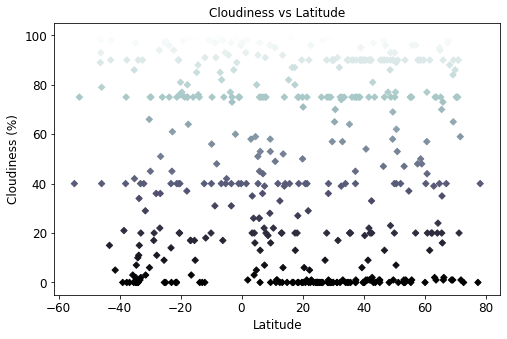

In [12]:
# Using pandas plot cloudiness vs. latitude, save as png in output_data folder
clean_city_data.plot.scatter('Lat',"Cloudiness", c='Cloudiness',title='Cloudiness vs Latitude',
                             colormap='bone',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness (%)',fontsize=12)
plt.savefig('output_data/lat_cloud.png')

>Cloudiness appears to be relatively evenly distributed versus latitude. Perhaps just slightly cloudier in the Northern Hemisphere currently during winter.

## Latitude vs. Wind Speed Plot

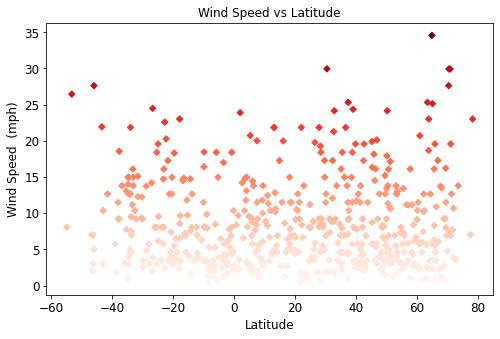

In [13]:
# Using pandas plot wind speed vs. latitude, save as png in output_data folder
clean_city_data.plot.scatter('Lat',"Wind Speed", c='Wind Speed',title='Wind Speed vs Latitude',
                             colormap='Reds',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed  (mph)',fontsize=12)
plt.savefig('output_data/lat_wind.png')

>Very slight increase in windspeed in the Northern Hemisphere during the winter months. 

## Linear Regression

In [14]:
# Prepare dataframes for northern and southern hemispheres
north_df = clean_city_data[clean_city_data['Lat']>0]
south_df = clean_city_data[clean_city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

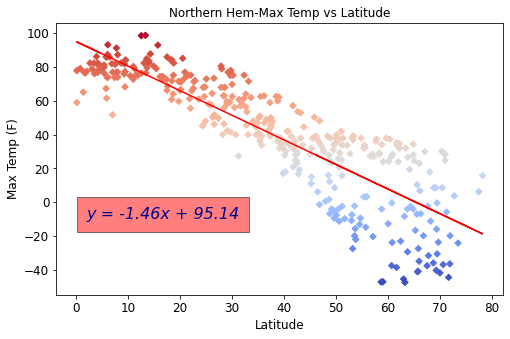

In [15]:
# Using pandas plot max temperature vs latitude for the northern hemisphere
north_df.plot.scatter('Lat',"Max Temp", c='Max Temp',title='Northern Hem-Max Temp vs Latitude',
                             colormap='coolwarm',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Max Temp (F)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Max Temp'])

# Calculate target values for regression line 
regress_values = north_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(north_df['Lat'],regress_values,'-r')

# Print regression equation to plot
plt.text(2,-10,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save the figure for later use
plt.savefig('output_data/reg_norlat_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

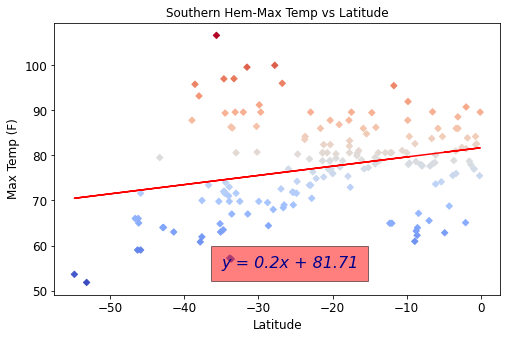

In [16]:
# Using pandas plot max temperature vs latitude for the southern hemisphere
south_df.plot.scatter('Lat',"Max Temp", c='Max Temp',title='Southern Hem-Max Temp vs Latitude',
                             colormap='coolwarm',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Max Temp (F)',fontsize=12)
# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Max Temp'])

# Calculate target values for regression line 
regress_values = south_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(south_df['Lat'],regress_values,"r-")

# Print regression equation to plot
plt.text(-35,55,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_sudlat_temp.png')

>Regression analysis of temperature vs latitude by northern/southern hemisphere indicate that the further away from the equator the cooler the temperature. Temperatures while traveling north get colder quicker due to seasonal influence.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

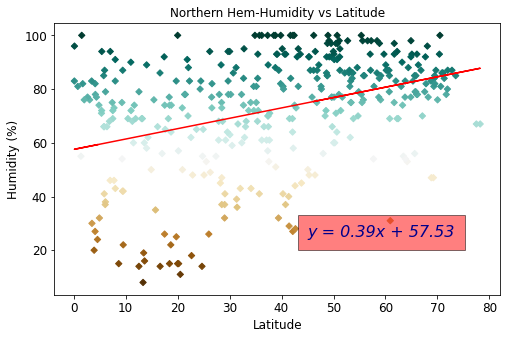

In [17]:
# Using pandas plot max humidity vs latitude for the northern hemisphere
north_df.plot.scatter('Lat',"Humidity", c='Humidity',title='Northern Hem-Humidity vs Latitude',
                             colormap='BrBG',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity (%)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Humidity'])

# Calculate target values for regression line 
regress_values = north_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line on scatter data
plt.plot(north_df['Lat'],regress_values,'-r')

# Print regression equation to plot
plt.text(45,25,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_norlat_humd.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

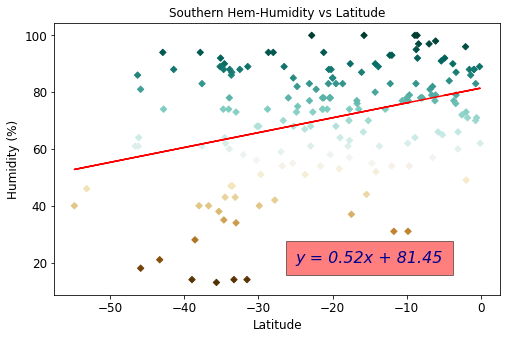

In [20]:
# Using pandas plot humidity vs latitude for the southern hemisphere
south_df.plot.scatter('Lat',"Humidity", c='Humidity',title='Southern Hem-Humidity vs Latitude',
                             colormap='BrBG',marker='D',figsize=(8,5), fontsize=12,colorbar=False)

# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity (%)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Humidity'])

# Calculate target values for regression line 
regress_values = south_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(south_df['Lat'],regress_values,"r-")

# Print regression equation to plot
plt.text(-25,20,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_sudlat_humd.png')

>Definitive bands of 'dryness' appear in both hemispheres. While the nothern hemisphere gains moisture content at increasing latitude, the southern hemisphere becomes more arid as you progress away from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

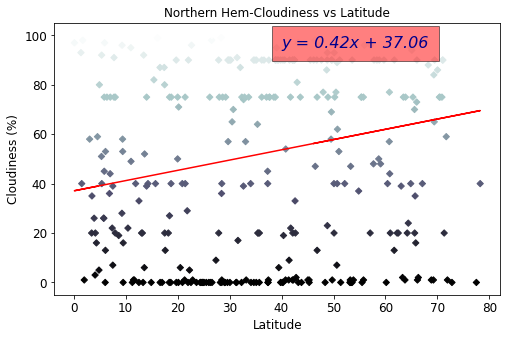

In [21]:
# Using pandas plot max cloudiness vs latitude for the northern hemisphere
north_df.plot.scatter('Lat',"Cloudiness", c='Cloudiness',title='Northern Hem-Cloudiness vs Latitude',
                             colormap='bone',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness (%)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Cloudiness'])

# Calculate target values for regression line 
regress_values = north_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(north_df['Lat'],regress_values,'-r')

# Print regression equation to plot
plt.text(40,95,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save figure for future use
plt.savefig('output_data/reg_norlat_cloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

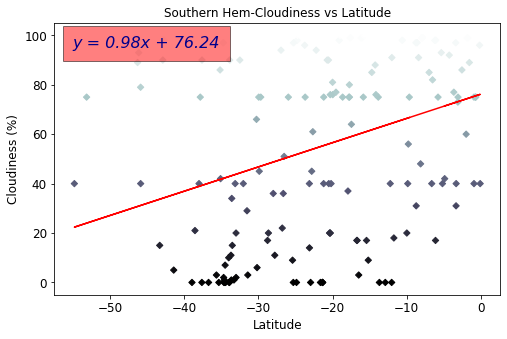

In [22]:
# Using pandas plot cloudiness vs latitude for the southern hemisphere
south_df.plot.scatter('Lat',"Cloudiness", c='Cloudiness',title='Southern Hem-Cloudiness vs Latitude',
                             colormap='bone',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness (%)',fontsize=12)
# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Cloudiness'])

# Calculate target values for regression line 
regress_values = south_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(south_df['Lat'],regress_values,"r-")

# Print regression equation on plot
plt.text(-55,95,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_sudlat_cloud.png')

>While the data shows fairly even distribution overall, cloud cover increase from south pole to north pole. Perhaps as an effect of seasonal influence or perhaps more data is needed in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

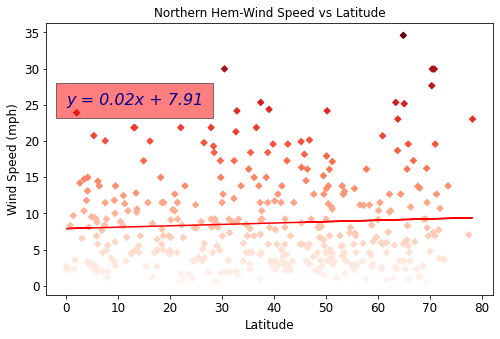

In [23]:
# Using pandas plot wind speed vs latitude for the northern hemisphere
north_df.plot.scatter('Lat',"Wind Speed", c='Wind Speed',title='Northern Hem-Wind Speed vs Latitude',
                             colormap='Reds',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed (mph)',fontsize=12)

# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Wind Speed'])

# Calculate target values for regression line 
regress_values = north_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(north_df['Lat'],regress_values,'-r')

# Print regression equation on plot
plt.text(0,25,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_norlat_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

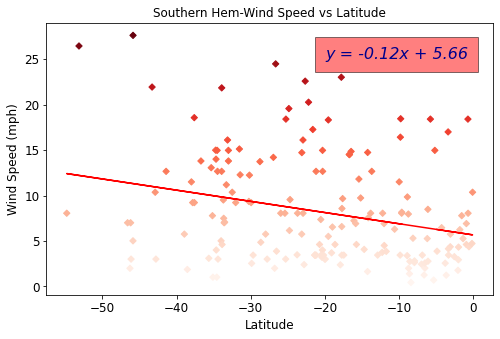

In [25]:
# Using pandas plot wind speed vs latitude for the souther hemisphere
south_df.plot.scatter('Lat',"Wind Speed", c='Wind Speed',title='Southern Hem-Wind Speed vs Latitude',
                             colormap='Reds',marker='D',figsize=(8,5), fontsize=12,colorbar=False)
# Set plot labels
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed (mph)',fontsize=12)
# Assign lingress output to each output parameter as a variable
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Wind Speed'])

# Calculate target values for regression line 
regress_values = south_df['Lat'] * slope + intercept

# Assign regression equation to string object to print onto plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line over scatter data
plt.plot(south_df['Lat'],regress_values,"r-")

# Print regression equation on plot
plt.text(-20,25,line_eq,fontsize=16,color="darkblue",style='oblique',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Save plot for future use
plt.savefig('output_data/reg_sudlat_wind.png')

>Windspeed very evenly distributed in the northern hemisphere with little to no change latitudinally. Wind speeds in the southern hemisphere increase mildly from equator to south pole. 